In [1]:
# Multiple Linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('E:\\Semester-6\\Machine Learning\\CarPrice_Assignment.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[1 3 'alfa-romero giulia' ... 5000 21 27]
 [2 3 'alfa-romero stelvio' ... 5000 21 27]
 [3 1 'alfa-romero Quadrifoglio' ... 5000 19 26]
 ...
 [203 -1 'volvo 244dl' ... 5500 18 23]
 [204 -1 'volvo 246' ... 4800 26 27]
 [205 -1 'volvo 264gl' ... 5400 19 25]]


In [5]:
print(Y)

[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400.    16503.     5389.
  6189.     6669.     7689.     9959.     8499.    12629.    14869.
 14489.     6989.     8189.     9279.     9279.     5499.     7099.
  6649.     6849.     7349.     7299.     7799.     7499.     7999.
  8249.     8949.     9549.    13499.    14399. 

In [6]:
# Encoding Categorical Data

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), [2, 3, 4, 5, 6, 7, 8, 14, 15, 17])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
print(X[0])

[2.0 1.0 0.0 1.0 0.0 2.0 0.0 0.0 2.0 5.0 1 3 88.6 168.8 64.1 48.8 2548 130
 3.47 2.68 9.0 111 5000 21 27]


In [8]:
# Splitting Dataset into Training and Testing Dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [10]:
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(X_train[0], X_test[0])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=90.000, p=0.374
Same distribution (fail to reject H0)


C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [11]:
# Training the Multiple Linear Regression model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [13]:
# Predicting the test Results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[ 4838.45  6795.  ]
 [17791.96 15750.  ]
 [13281.9  15250.  ]
 [ 4998.97  5151.  ]
 [10145.1   9995.  ]
 [11915.56 11199.  ]
 [ 7273.91  5389.  ]
 [ 5302.    7898.  ]
 [19247.85 17199.  ]
 [ 7681.12  6529.  ]
 [16926.2  20970.  ]
 [22395.58 31400.5 ]
 [11722.37 10945.  ]
 [11745.83 18344.  ]
 [ 7354.72  8916.5 ]
 [10746.45  9989.  ]
 [ 9274.36  9295.  ]
 [19962.65 18920.  ]
 [ 9821.3   7895.  ]
 [ 6823.29  6488.  ]
 [10783.65  9959.  ]
 [19569.87 15580.  ]
 [ 8837.17  9895.  ]
 [13041.23 11549.  ]
 [20766.06 15998.  ]
 [ 7251.94  5118.  ]
 [ 5277.13  6938.  ]
 [20161.23 16695.  ]
 [ 7839.02  8358.  ]
 [15627.07  5499.  ]
 [ 7976.31  7975.  ]
 [10992.1  12290.  ]
 [15250.87 22018.  ]
 [10196.19  8948.  ]
 [ 6676.9   6849.  ]
 [24887.14 41315.  ]
 [ 8302.62 11595.  ]
 [14947.21 18150.  ]
 [ 7032.41  6377.  ]
 [37792.93 45400.  ]
 [ 6138.71  8916.5 ]]


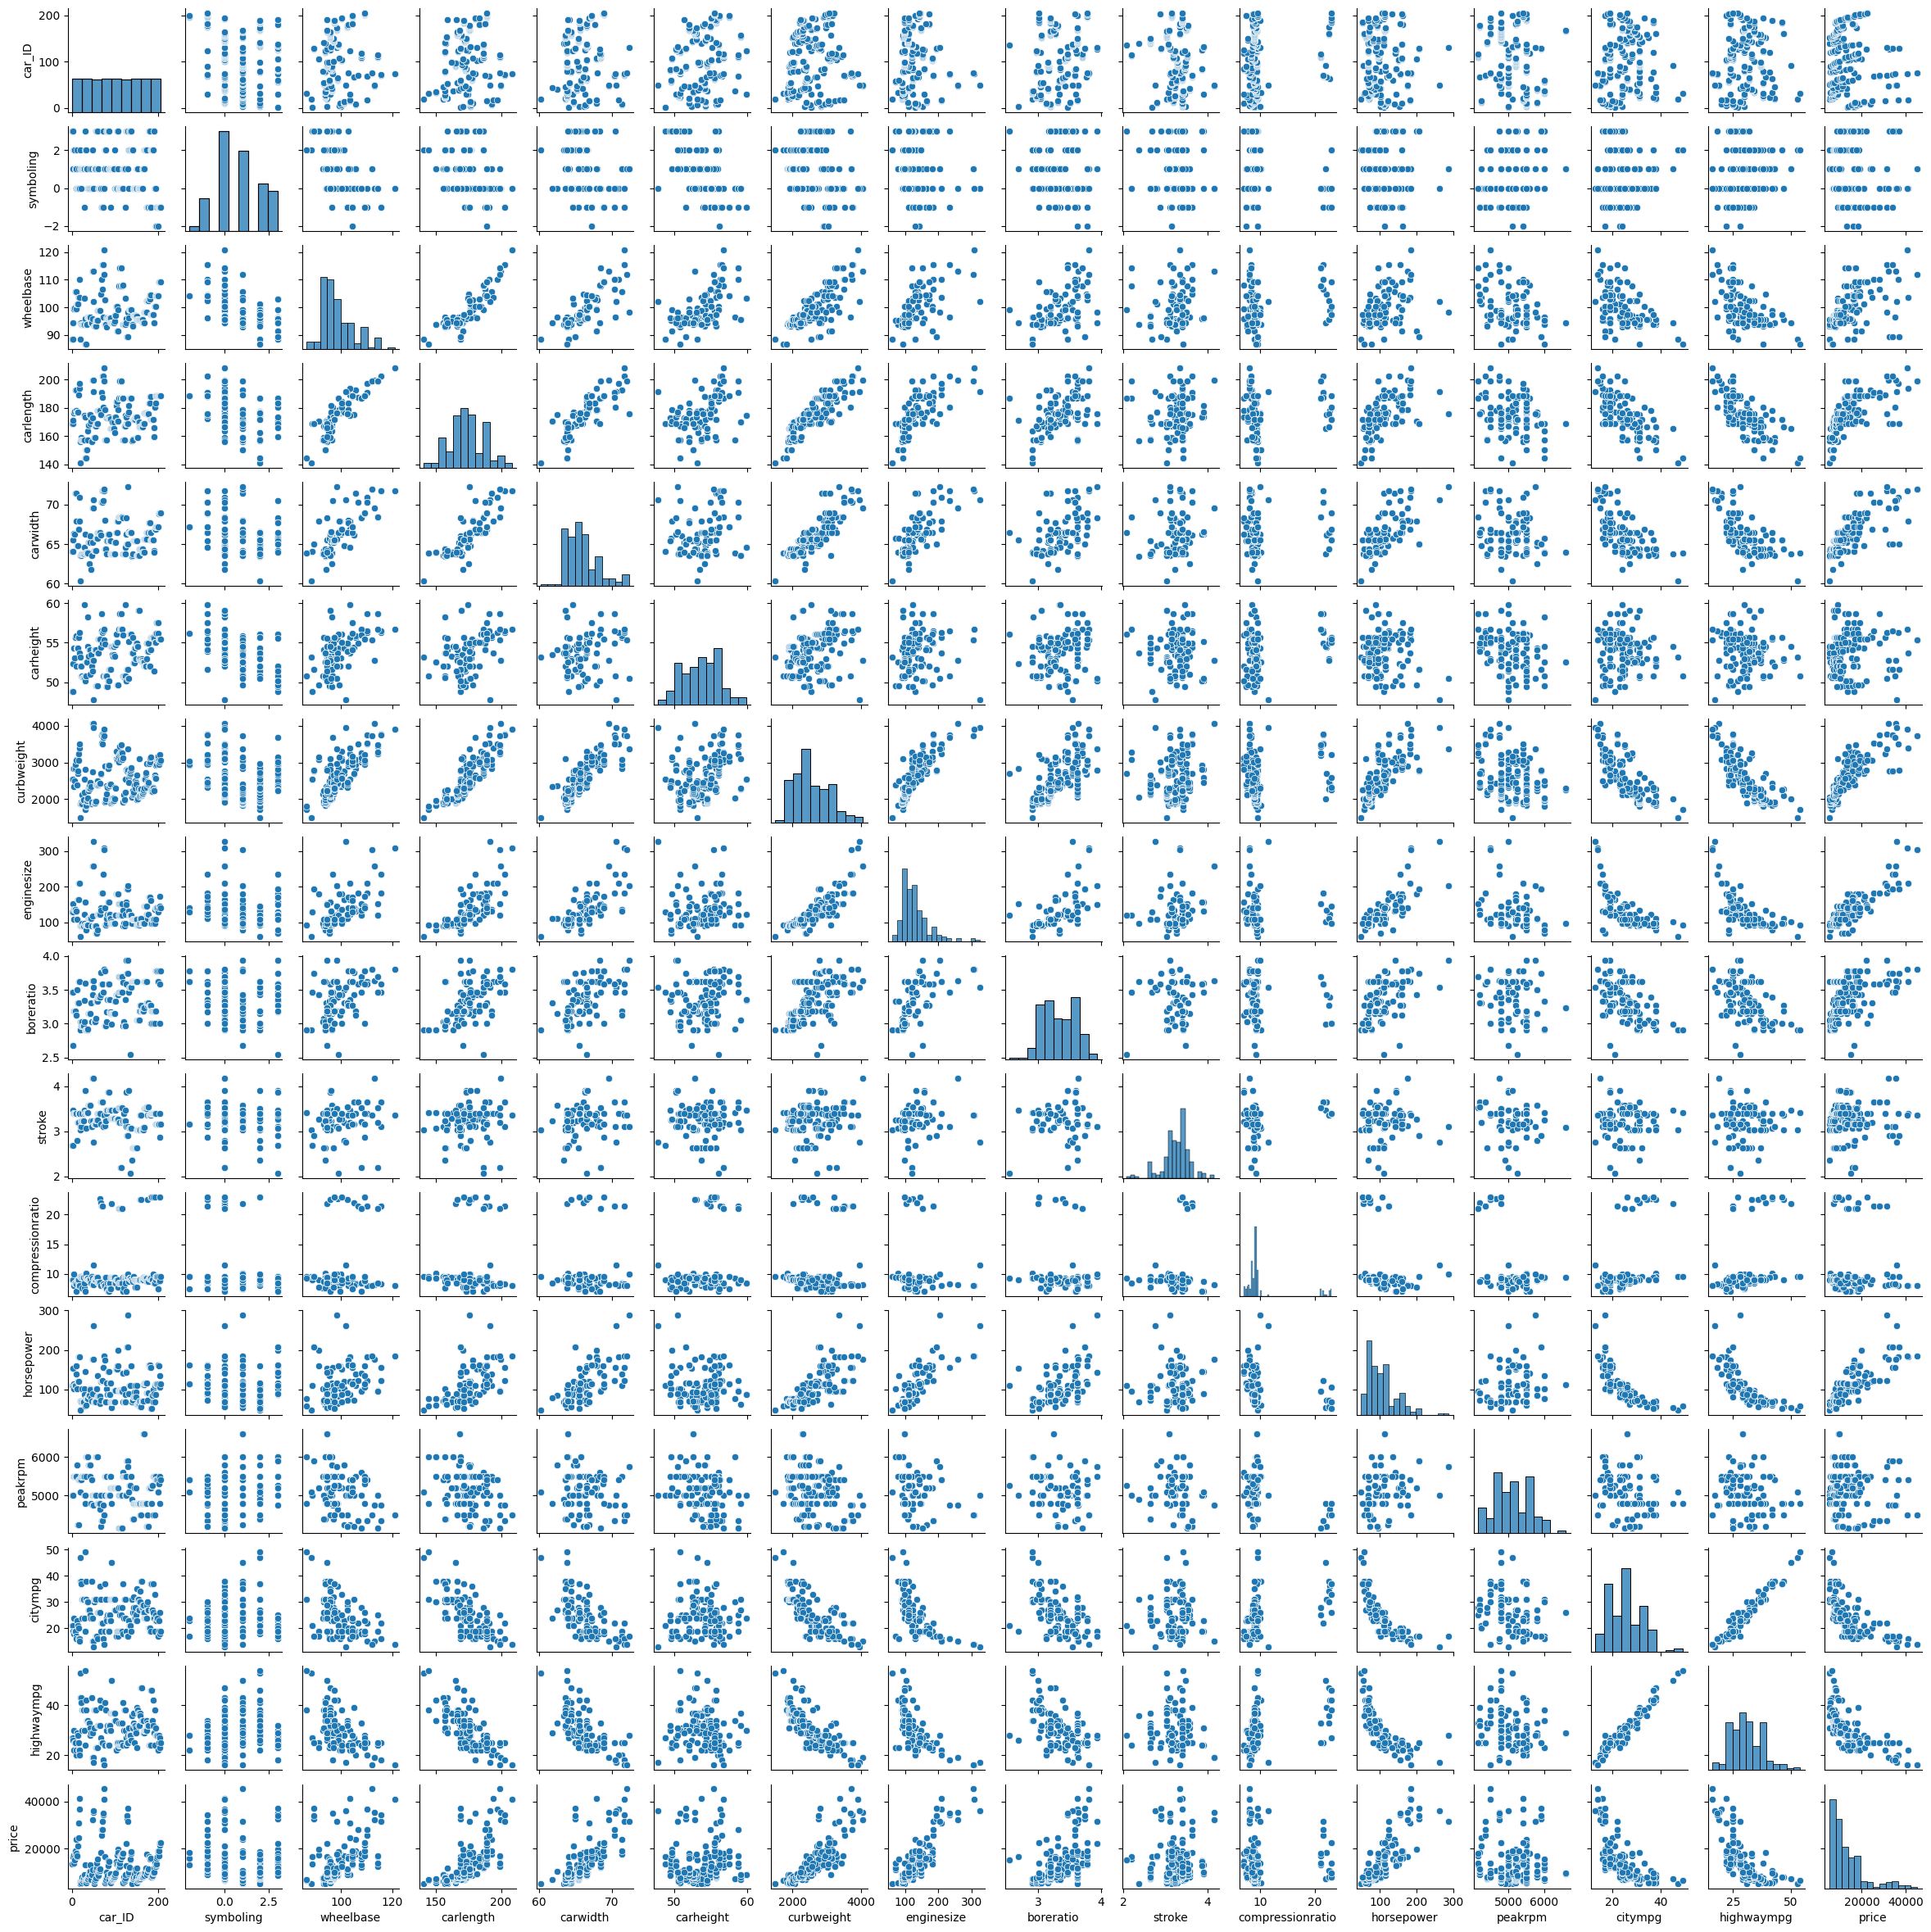

In [14]:
# Visualising the dataset

import seaborn as sns  
sns.pairplot(data = dataset, height = 1.5)

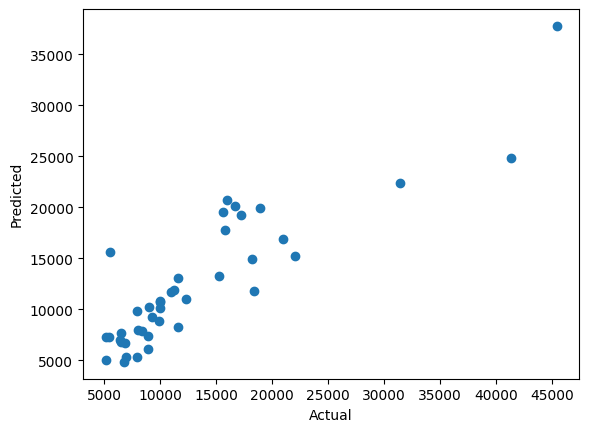

In [15]:
# Plot of Results

plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

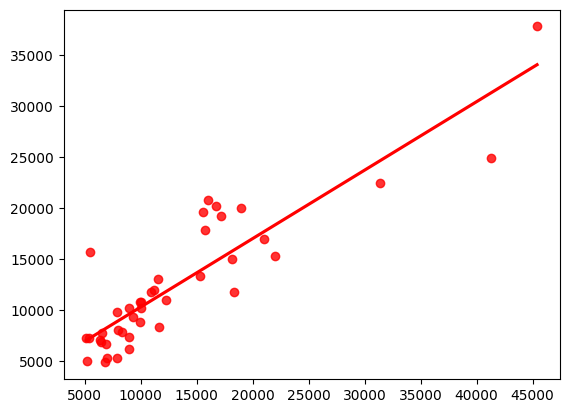

In [16]:
# Regression plot of model

sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');

In [18]:
from sklearn.metrics import mean_absolute_error

MAE =  mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error : " , MAE)

Mean Absolute Error :  2786.0057883943705


In [20]:
from sklearn.metrics import mean_squared_error

MSE =  mean_squared_error(Y_test, y_pred)
print("Mean Squared Error : ", MSE)

Mean Squared Error :  18259930.02850349


In [21]:
import math

MSE = np.square(np.subtract(Y_test, y_pred)).mean()
RMSE = math.sqrt(MSE)
print("Root Mean Square Error : ", RMSE)

Root Mean Square Error :  4273.163936535022


In [22]:
from sklearn.metrics import r2_score

r = r2_score(Y_test, y_pred)
print(r)

0.7641334409441414


In [23]:
import sklearn.metrics as metrics

r2_sk = metrics.r2_score(Y_test, y_pred)
N = Y_test.shape[0]
p = 3
x = (1-r)
y = (N-1)/ (N-p-1)
adj_rsquared = (1- (x*y))
print(adj_rsquared)

0.7450091253450177
